### Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Dicionário de Variáveis utilizadas

UPA: Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))

V1008: Número do Domicílio

Estrato

V1014: Painel - Grupo de Amostra

V1016: Número de entrevista (1 a 5)

V2003: Número de ordem

V1028: Peso dos domicílios e das pessoas

V2007: Sexo (Mapeamento para as variáveis: Homem - 0, Mulher - 1)

V2008: Dia Nascimento

V20081: Mês nascimento

V20082: Ano nascimento

Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

#### Importação e tratamento dos microdados

In [44]:
#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008','V1014','V2003', 'V2007', 'V2008', 'V20081', 'V20082', 'V4022', 'V1016', 'V1028']

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(f'/home/matheus/Microdados PNAD/{ano}_{tri}.csv', usecols=colunas_selecionadas)
        if 2019 < ano < 2022:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(f'/home/matheus/Microdados PNAD/{ano}_{tri}.csv', usecols=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(f'/home/matheus/Microdados PNAD/{ano}_{tri}.csv', usecols=colunas_selecionadas)


2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [46]:
#Conversão das variável V2007(sexo) para inteira. Homem = 0, Mulher = 1
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)


In [48]:
#dataframe com a ID da pessoa e a variável de interesse

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028']})
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028']})
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028']})

In [49]:
pnadc_completa = pd.concat([pnad_2019_4_id_local, 
                            pnad_2020_1_id_local, 
                            pnad_2020_2_id_local, 
                            pnad_2020_3_id_local, 
                            pnad_2020_4_id_local, 
                            pnad_2021_1_id_local, 
                            pnad_2021_2_id_local, 
                            pnad_2021_3_id_local, 
                            pnad_2021_4_id_local, 
                            pnad_2022_1_id_local, 
                            pnad_2022_2_id_local])

In [50]:
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)

In [51]:
#concatenar coluna ano e trimestre em uma única coluna
pnadc_completa['Ano_Tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)

#Conversão para formato de data
#

In [52]:
pnadc_completa['Ano_Tri'] = pd.PeriodIndex(pnadc_completa['Ano_Tri'], freq='Q')

In [53]:
display(pnadc_completa)

,Ano,Trimestre,ID,V4022,V1016,V1028,Ano_Tri
0,2019,4,110002004,NaN,4,145.628790,2019Q4
1,2019,4,110002036,NaN,4,145.628790,2019Q4
2,2019,4,110002054,NaN,4,145.628790,2019Q4
3,2019,4,110002081,NaN,4,145.628790,2019Q4
4,2019,4,110002013,NaN,4,134.017538,2019Q4
...,...,...,...,...,...,...,...
482113,2022,2,530059587,NaN,3,81.626590,2022Q2
482114,2022,2,530059544,NaN,3,72.323502,2022Q2
482115,2022,2,530059580,NaN,3,72.323502,2022Q2
482116,2022,2,530059589,NaN,3,72.323502,2022Q2


#### Exploração

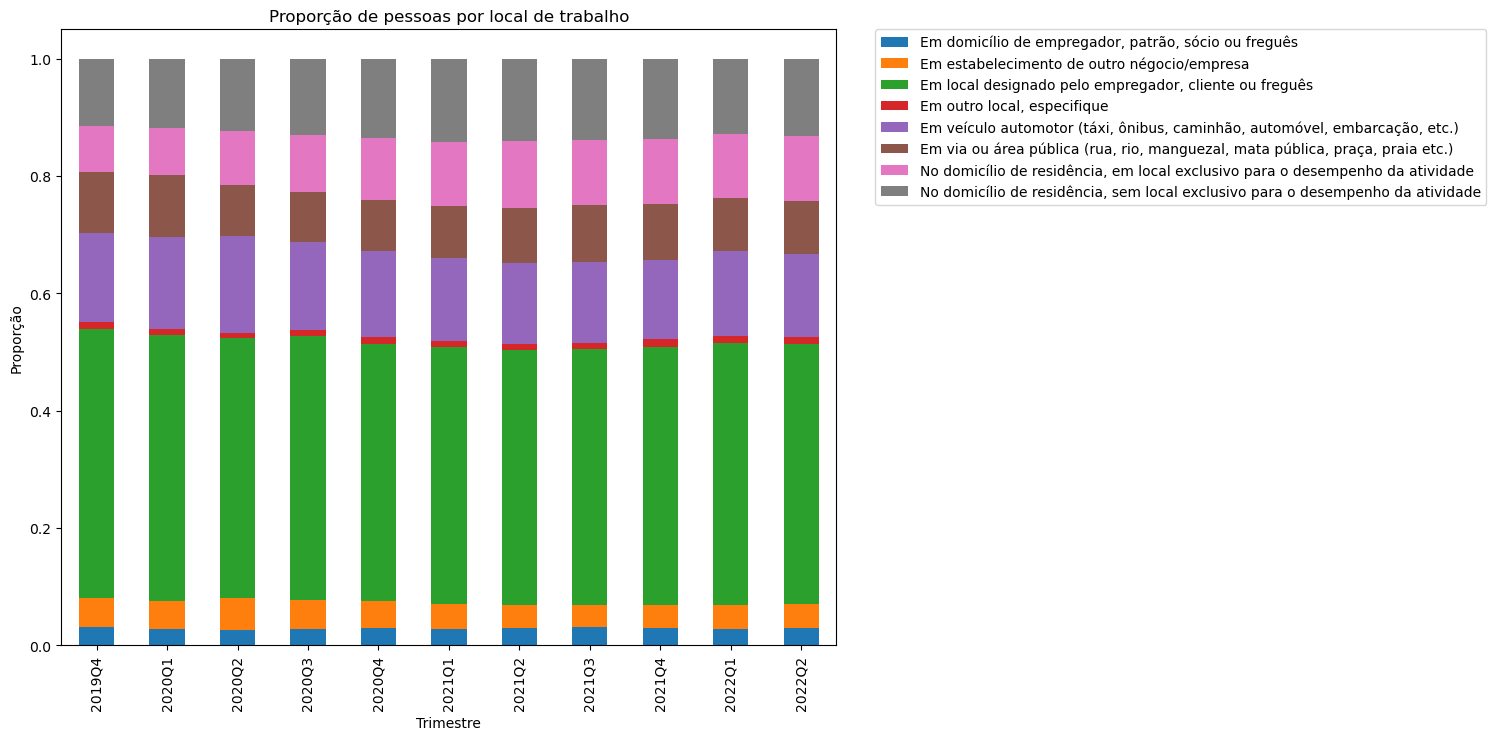

In [119]:
cross_tab_prop = pd.crosstab(index=pnadc_completa['Ano_Tri'],
                             columns=pnadc_completa['V4022'],
                             normalize="index")


cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 8), title='Proporção de pessoas por local de trabalho')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Trimestre')
plt.ylabel('Proporção')

plt.show()

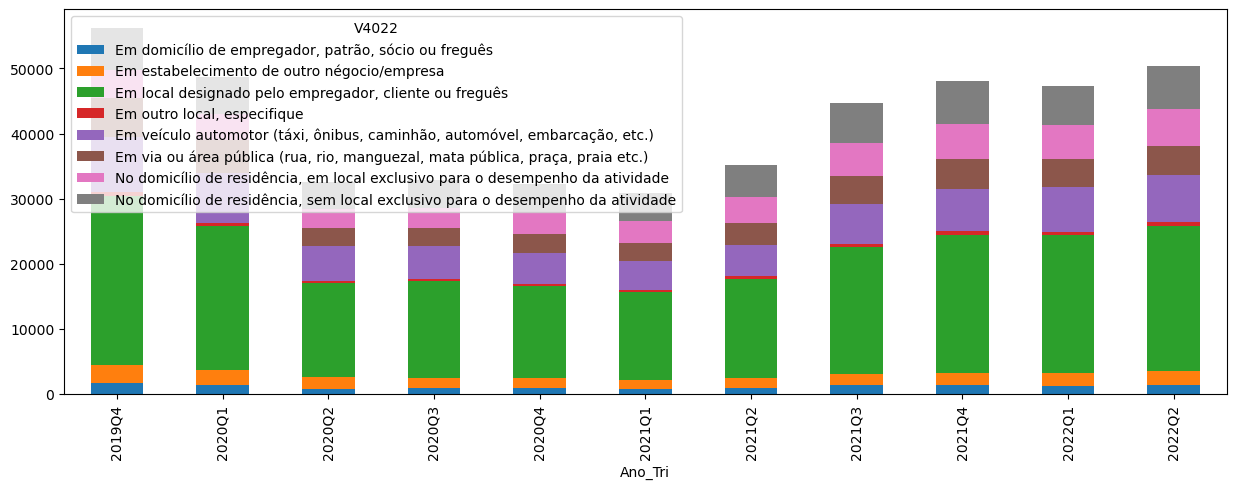

In [79]:
pnadc_completa.groupby('Ano_Tri')['V4022'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))
plt.show()

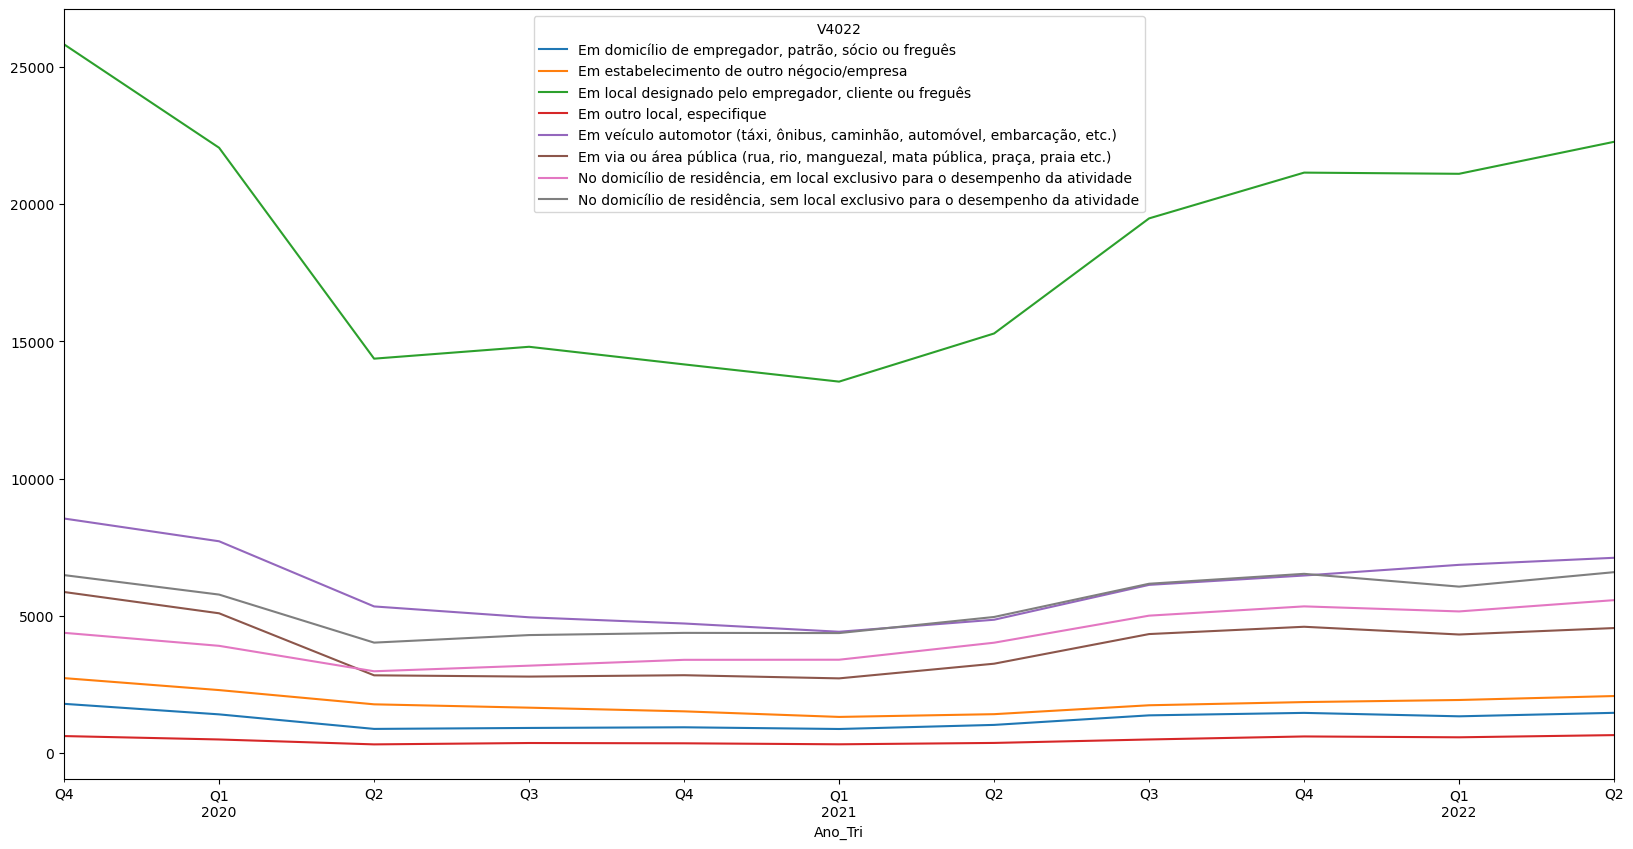

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))
pnadc_completa.groupby('Ano_Tri')['V4022'].value_counts().unstack().plot(ax=ax)
plt.show()

In [64]:
pnadc_completa[pnadc_completa['ID'] == 110002613]

,Ano,Trimestre,ID,V4022,V1016,V1028,Ano_Tri
97,2019,4,110002613,"Em local designado pelo empregador, cliente ou...",2,127.924790,2019Q4
6914,2019,4,110002613,NaN,1,159.171698,2019Q4
91,2020,1,110002613,NaN,3,140.095413,2020Q1
102,2020,1,110002613,NaN,3,125.056028,2020Q1
112,2020,1,110002613,NaN,3,146.434102,2020Q1
4923,2020,1,110002613,NaN,1,222.203964,2020Q1
6087,2020,1,110002613,NaN,2,205.362717,2020Q1
6100,2020,1,110002613,"Em local designado pelo empregador, cliente ou...",2,155.480757,2020Q1
92,2020,2,110002613,NaN,4,142.170051,2020Q2
103,2020,2,110002613,NaN,4,119.985962,2020Q2


In [59]:
pnadc_completa.dropna().head(50)

,Ano,Trimestre,ID,V4022,V1016,V1028,Ano_Tri
39,2019,4,110002051,"Em domicílio de empregador, patrão, sócio ou f...",4,159.289284,2019Q4
45,2019,4,110002025,"Em via ou área pública (rua, rio, manguezal, m...",4,126.666785,2019Q4
61,2019,4,110002060,"Em via ou área pública (rua, rio, manguezal, m...",2,197.943680,2019Q4
63,2019,4,110002038,"Em via ou área pública (rua, rio, manguezal, m...",2,197.943680,2019Q4
83,2019,4,110002600,"Em via ou área pública (rua, rio, manguezal, m...",2,151.188967,2019Q4
97,2019,4,110002613,"Em local designado pelo empregador, cliente ou...",2,127.924790,2019Q4
101,2019,4,110002614,"Em via ou área pública (rua, rio, manguezal, m...",2,138.182666,2019Q4
103,2019,4,110002610,"Em local designado pelo empregador, cliente ou...",2,115.576816,2019Q4
105,2019,4,110002576,"Em via ou área pública (rua, rio, manguezal, m...",2,125.313812,2019Q4
113,2019,4,110002589,"Em local designado pelo empregador, cliente ou...",2,115.373601,2019Q4


In [57]:
#isso pode ser um erro??????
pnadc_completa[pnadc_completa['ID'] == 110005406]

,Ano,Trimestre,ID,V4022,V1016,V1028,Ano_Tri
